In [1]:
from kmeans import KMeansClustering
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
km = KMeansClustering()
km.open("F:\Thesis\data\SemEval\hateval2019_en_train.csv")
km.filter(HS='0', TR='0', AG='0')
cleaned_data = km.clean()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)


INFO:root:Original data length: 9000
INFO:root:After applying filters: 5093
INFO:root:Data length after removing invalid tweets: 1030
INFO:root:Explained variance of the SVD step: 29%


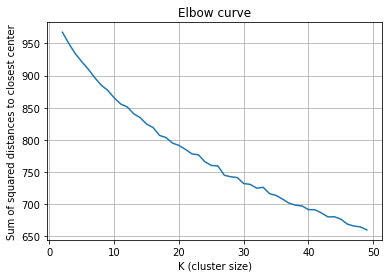

In [3]:
%matplotlib inline
km.plot_elbow_curve(max_k=50, X=X)

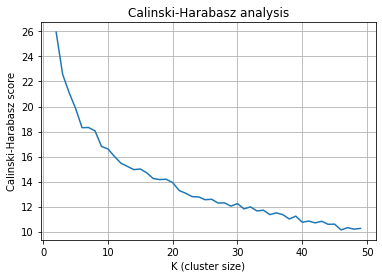

In [4]:
%matplotlib inline
# Higher values are better, when clusters are dense and well separated
km.plot_calinski_harabasz_analysis(max_k=50, X=X)

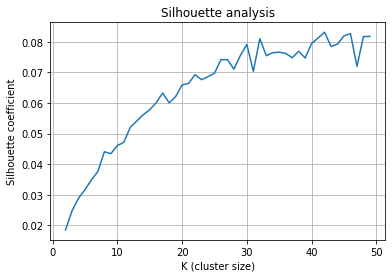

In [5]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=50, X=X)

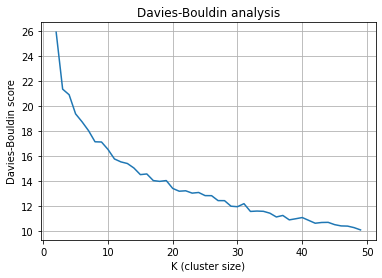

In [6]:
%matplotlib inline
# Values close to zero indicate a better partition
km.plot_davies_bouldin_score_analysis(max_k=50, X=X)

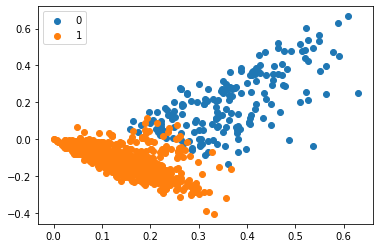

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Selected optimal K value
K= 2
km_model = km.cluster(X=X, K=K)

#predict the labels of clusters.
label = km_model.predict(X)

#filter rows of original data
filtered_label0 = X[label == 0]
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [8]:
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 men women rape just like trash say woman bitch man

Cluster 1:
 like immigrant people just bitch fuck don woman cunt dick



In [9]:
km.cluster(X= X, K=K)
km.print_most_representative_samples(X=X, num_samples=5)

Cluster 0: most representative sample indices: [429 974 868 146 746]
['7323', "It's what I do, it's who I am 😊", '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['8935', 'Im so sick of people treating me like SHIT then try to come back in my life after they changed Fuck you fuck your growth cause idgaf skank bitch', '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['8498', "who the fuck is calling my girl a whore and a bitch? She hasn't even been at that school for a whole month, people are fucking stupid", '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['3512', "Some people really dont understand why I get so upset at injustices happening in this country. Trust me, it's not that I like getting my panties in a wad over dumb things. It's the fact that people like me (minority, brown, immigrant, etc) r suffering and it affects me directly", '0', '0', '0', '', '', '', '', '', '', ''